In [2]:
# from aerobot.plot import plot_training_curve
import os
from aerobot.io import load_results_dict, RESULTS_PATH, FEATURE_SUBTYPES, FEATURE_TYPES
import matplotlib.pyplot as plt
from aerobot.plot import plot_configure_mpl, plot_model_accuracy_barplot, plot_order_feature_types, plot_percent_above_random_axis
from matplotlib.gridspec import GridSpec
from aerobot.dataset import dataset_load_training_validation
import pandas as pd 
import numpy as np 
from typing import Dict, List

%load_ext autoreload
%autoreload 2

plot_configure_mpl(n_colors=3)

# SI Figure 2 



In [3]:
# Load the model training results. 
nonlinear_results_ternary = dict()
logistic_results_ternary = dict()
logistic_results_binary = dict()

for feature_type in FEATURE_SUBTYPES + FEATURE_TYPES:
    nonlinear_results_ternary[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_nonlinear_{feature_type}_ternary.json'))
    logistic_results_ternary[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_logistic_{feature_type}_ternary.json'))
    logistic_results_binary[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_logistic_{feature_type}_binary.json'))

In [4]:
def plot_si_figure_2a(logistic_results_binary:Dict, grid:GridSpec=None, fig:plt.Figure=None):  
    '''Plots a barplot showing the final training and validation accuracies of the binary Logistic classifier.'''
    ax = fig.add_subplot(grid)
    
    ax.set_title('Logistic binary classifier')
    plot_percent_above_random_axis(ax, binary=True)

    order_by = {f:r['validation_acc'] for f, r in logistic_results_binary.items()}
    feature_type_order = plot_order_feature_types(list(logistic_results_binary.keys()), order_by=order_by)

    # Might be good to sort features on the bar plot according to validation accuracy. 
    plot_model_accuracy_barplot(logistic_results_binary, ax=ax, feature_type_order=feature_type_order)

In [5]:
def plot_si_figure_2b(logistic_results_ternary:Dict, grid:GridSpec=None, fig:plt.Figure=None):
    '''Plots a barplot showing the final training and validation accuracies of the ternary Logistic classifier.'''
    ax = fig.add_subplot(grid)

    ax.set_title('Logistic ternary classifier')
    plot_percent_above_random_axis(ax, binary=False)

    order_by = {f:r['validation_acc'] for f, r in logistic_results_ternary.items()}
    feature_type_order = plot_order_feature_types(list(logistic_results_ternary.keys()), order_by=order_by)

    # Might be good to sort features on the bar plot according to validation accuracy. 
    plot_model_accuracy_barplot(logistic_results_ternary, ax=ax, feature_type_order=feature_type_order)

In [6]:
def plot_si_figure_2c(nonlinear_results_ternary:Dict, grid:GridSpec=None, fig:plt.Figure=None):
    '''Plots a barplot showing the final training and validation accuracies of the ternary Nonlinear classifier.'''
    ax = fig.add_subplot(grid)

    ax.set_title('Nonlinear ternary classifier')
    plot_percent_above_random_axis(ax, binary=False)

    order_by = {f:r['validation_acc'] for f, r in nonlinear_results_ternary.items()}
    feature_type_order = plot_order_feature_types(list(nonlinear_results_ternary.keys()), order_by=order_by)

    # Might be good to sort features on the bar plot according to validation accuracy. 
    plot_model_accuracy_barplot(nonlinear_results_ternary, ax=ax, feature_type_order=feature_type_order)

/tmp/ipykernel_319146/1168873518.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


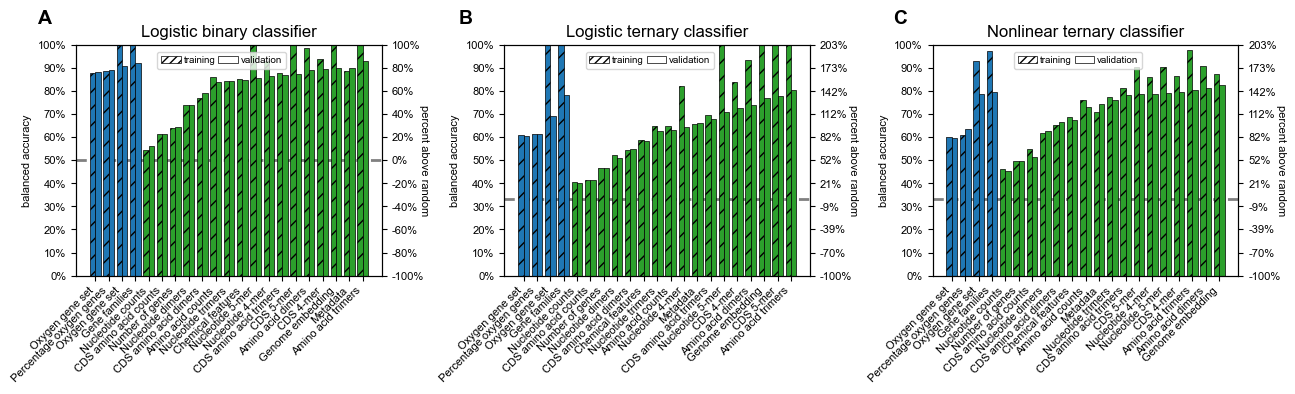

In [7]:
fig = plt.figure(figsize=(15, 3))
grid = GridSpec(1, 3, wspace=0.4, hspace=0.5)

plot_si_figure_2a(logistic_results_binary, grid=grid[0, 0], fig=fig)
plot_si_figure_2b(logistic_results_ternary, grid=grid[0, 1], fig=fig)
plot_si_figure_2c(nonlinear_results_ternary, grid=grid[0, 2], fig=fig)

fig.text(0.1, 0.95, 'A', weight='bold', fontsize=14)
fig.text(0.38, 0.95, 'B', weight='bold', fontsize=14)
fig.text(0.67, 0.95, 'C', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()
